# Marketing Analysis

### The is a CSV file of 2240 observations (customers) with 28 variables related to marketing data. More specifically, the variables provide insights about:
1.Customer profiles
2.Products purchased
3.Campaign success (or failure)
4.Channel performance

In [3]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
marketing_data = pd.read_csv('marketing_data.csv')

In [5]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [6]:
marketing_data.shape

(2240, 28)

In [7]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

## Missing Values

In [8]:
#Percentage of missing values for all columns 
null_count=round(100*(marketing_data.isnull().sum()/len(marketing_data.index)),2)
null_count

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
 Income                1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Response               0.00
Complain               0.00
Country                0.00
dtype: float64

In [9]:
#remove null value
marketing_data_na = marketing_data.dropna()

In [10]:
# Check the descriptive statistics of numeric variables
marketing_data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Temporal Variables(Eg: Datetime Variables)

In [11]:
feature_year='Year_Birth'
print(feature_year, marketing_data[feature_year].unique())

Year_Birth [1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]


### Numeric Variable

In [12]:
# list of numerical variables
numerical_features = [feature for feature in marketing_data.columns if marketing_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
marketing_data[numerical_features].head()

Number of numerical variables:  23


,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,1826,1970,0,0,0,189,104,379,111,189,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,0,0,0,464,5,64,7,0,...,3,7,5,0,0,0,0,1,1,0
2,10476,1958,0,1,0,134,11,59,15,2,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,1,1,0,10,0,1,0,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,1,0,0,6,16,24,11,0,...,1,2,7,1,0,0,0,0,1,0


### Outlier

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


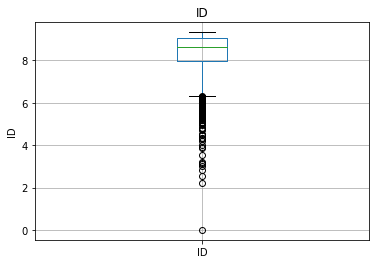

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


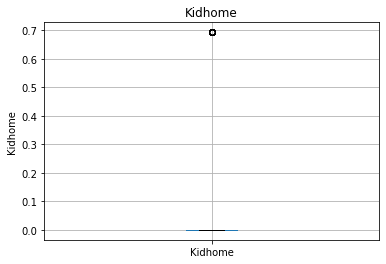

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


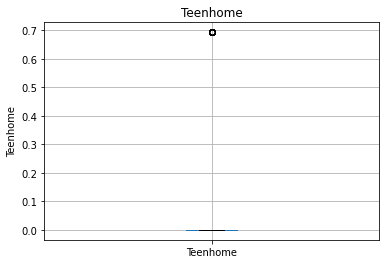

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


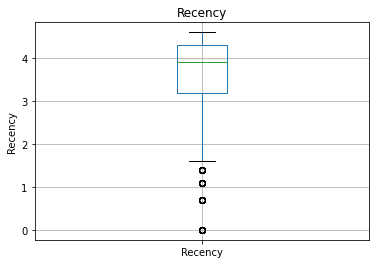

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


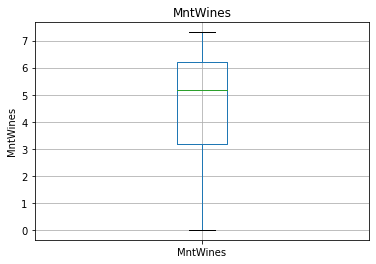

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


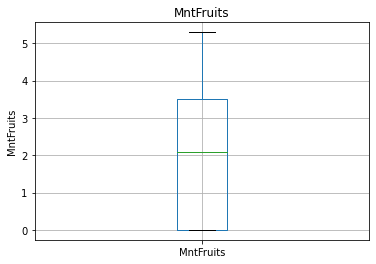

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


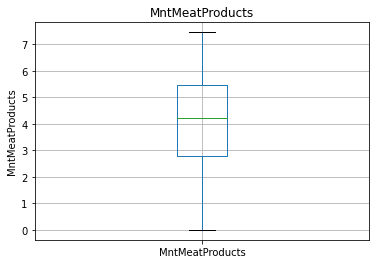

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


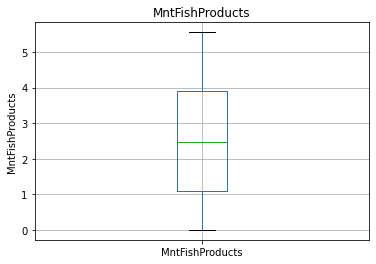

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


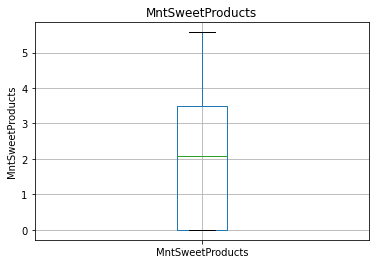

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


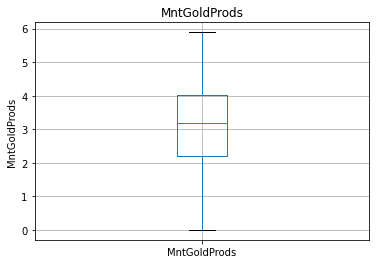

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


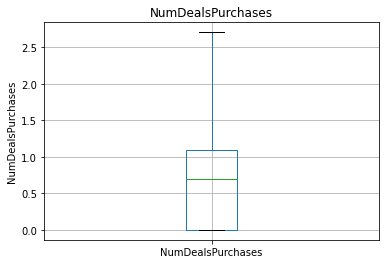

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


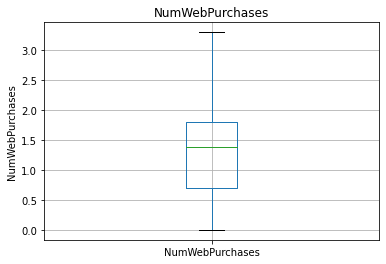

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


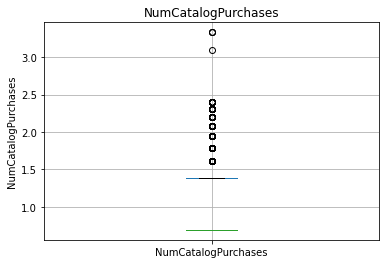

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


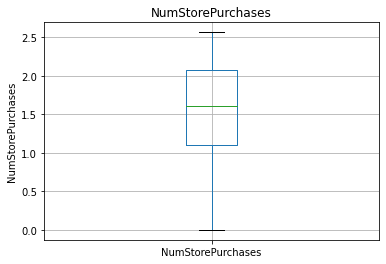

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


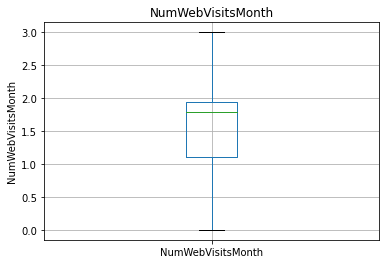

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


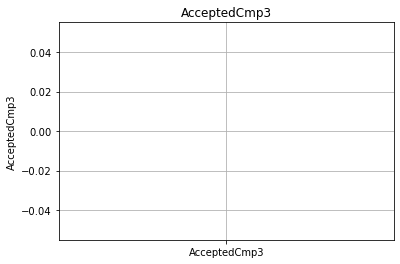

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


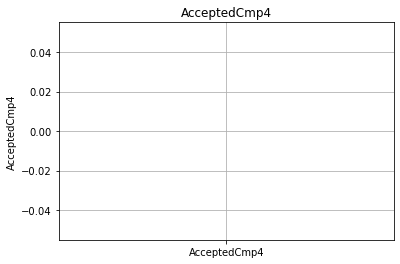

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


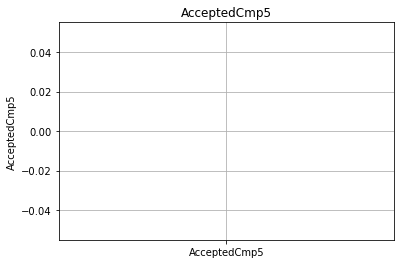

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


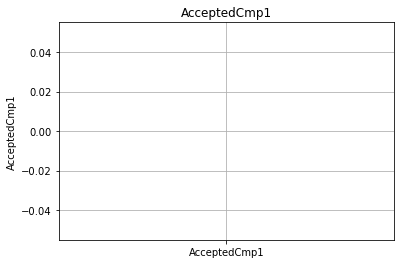

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


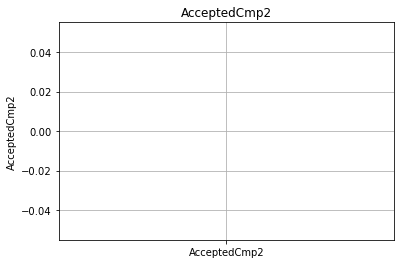

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


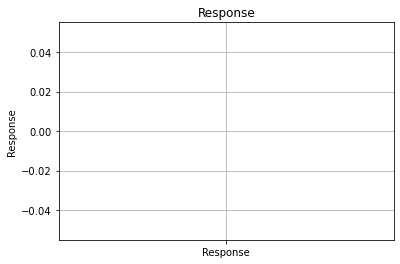

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


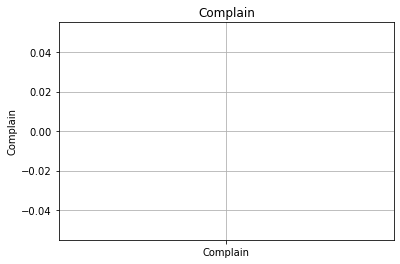

In [13]:
for feature in numerical_features:
    data=marketing_data.copy()
    if 0 not in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

<AxesSubplot:ylabel='Year_Birth'>

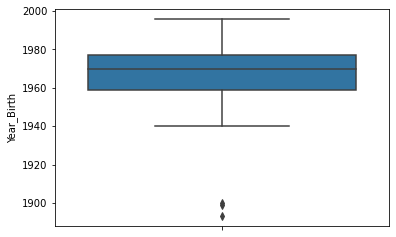

In [14]:
sns.boxplot(y=marketing_data_na["Year_Birth"])

In [15]:
#remove outliers in Year Birth column (births before 1920)
df2=marketing_data_na[marketing_data_na['Year_Birth'] >= 1920]

In [16]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


<AxesSubplot:ylabel='MntWines'>

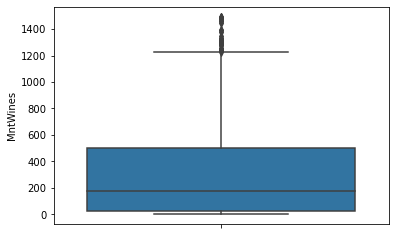

In [17]:
sns.boxplot(y=df2["MntWines"])

In [18]:
df2["MntWines"].value_counts()

2       42
6       37
5       37
1       37
4       33
        ..
948      1
944      1
940      1
934      1
1493     1
Name: MntWines, Length: 775, dtype: int64

In [19]:
#remove those entries with count of 1
counts = df2['MntWines'].value_counts()
df3 = df2.loc[df2['MntWines'].isin(counts.index[counts > 1])]

In [20]:
#clean the wine column again
df3=df3[df3['MntWines'] <= 1200]

<AxesSubplot:ylabel='MntMeatProducts'>

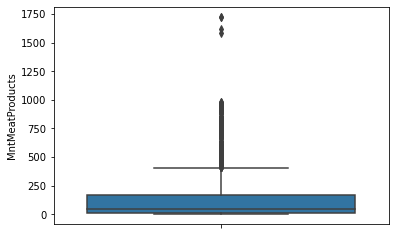

In [21]:
sns.boxplot(y=df3["MntMeatProducts"])

In [22]:
#cleaned columns
df3=df3[df3['MntMeatProducts'] <= 1500]
df3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,7232,1973,Graduation,Widow,"$42,429.00",0,1,2/11/14,99,55,...,3,5,0,0,0,0,0,0,0,SP
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP


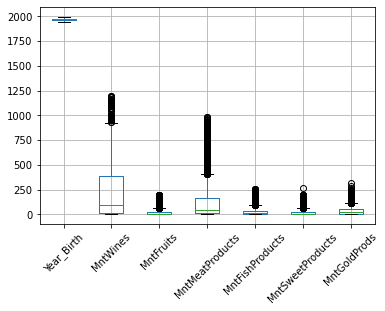

In [23]:
boxplot2 = df3.boxplot(column=['Year_Birth','MntWines','MntFruits', 'MntMeatProducts',      
                                  'MntFishProducts','MntSweetProducts', 'MntGoldProds'
                                  ], rot=45)

In [24]:
#drop column ID 
marketing_data.drop(columns= ['ID'], axis=1, inplace=True)
marketing_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP


<AxesSubplot:>

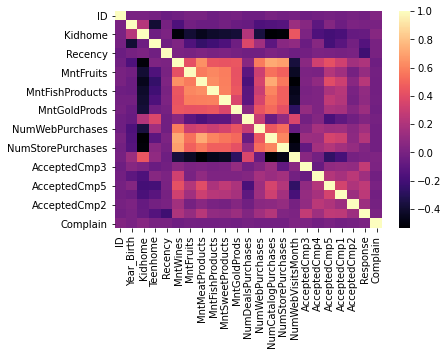

In [25]:
#look for correlations
corr1=df3.corr()
sns.heatmap(corr1, cmap="magma")

<AxesSubplot:title={'center':'Birth Year'}>

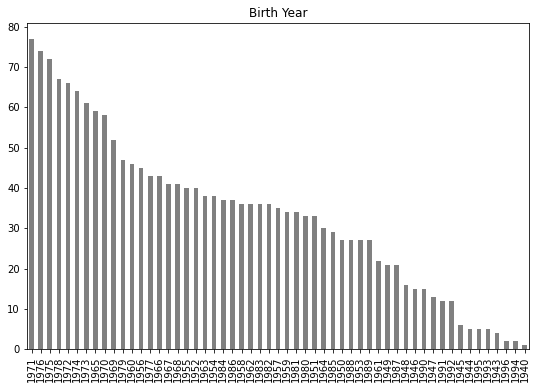

In [26]:
df3['Year_Birth'].astype(int).value_counts().plot(kind='bar', figsize=(9,6), color='gray', title='Birth Year')

<AxesSubplot:title={'center':'Education'}>

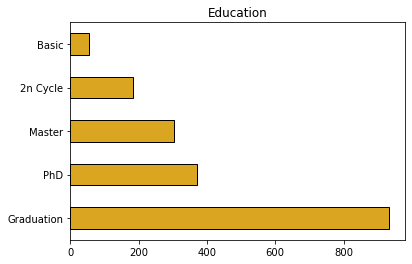

In [30]:
df3['Education'].value_counts().plot(kind='barh', figsize=(6,4), 
                                     edgecolor=(0,0,0),color='goldenrod', title='Education')

<AxesSubplot:title={'center':'Marital status'}>

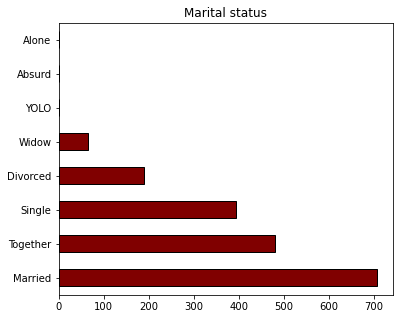

In [31]:
df3['Marital_Status'].value_counts().plot(kind='barh', figsize=(6,5), 
                                          color='maroon', title='Marital status',
                                         edgecolor=(0,0,0))

In [32]:
#The Income column needs datatype transformations
#update numeric data from str to float
df3[' Income ']=df3[' Income '].str.replace('$', '')
df3[' Income ']= df3[' Income '].str.replace(',', '')
df3[' Income ']=df3[' Income '].astype(float)

<ipython-input-32-3ae397d94521>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df3[' Income ']=df3[' Income '].str.replace('$', '')


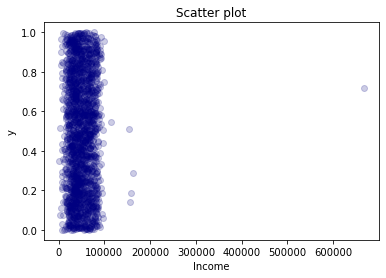

In [33]:
x = df3[' Income ']
y= np.random.rand(1843) #matches the lenght of x
colors = ('navy')
 
# Plot
plt.scatter(x, y, c=colors, alpha=0.2)
plt.title('Scatter plot')
plt.xlabel('Income')
plt.ylabel('y')
plt.show()

In [35]:
df3['Kidhome'].value_counts()


0    967
1    831
2     45
Name: Kidhome, dtype: int64

In [36]:
df3['Teenhome'].value_counts()

0    966
1    843
2     34
Name: Teenhome, dtype: int64

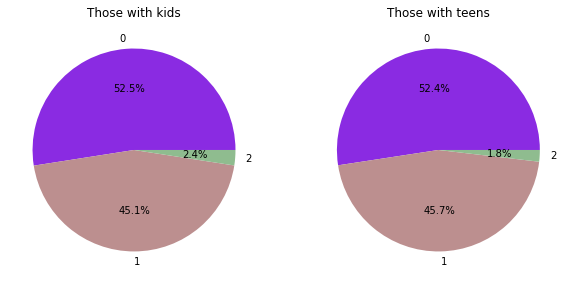

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1
colors= 'blueviolet', 'rosybrown', 'darkseagreen'

labels = df3['Kidhome'].unique()
values = df3['Kidhome'].value_counts()
ax1.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') #plot first pie


labels = df3['Teenhome'].unique()
values = df3['Teenhome'].value_counts()
ax2.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') #plot second pie

ax1.set(aspect="equal", title='Those with kids')
ax2.set(aspect="equal", title='Those with teens')
plt.show()

<AxesSubplot:>

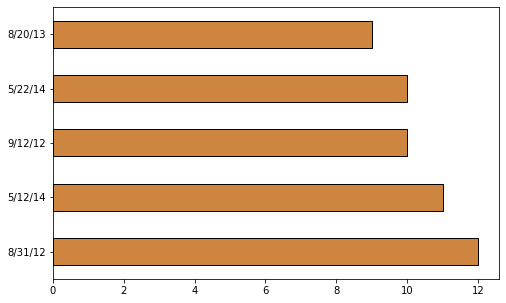

In [38]:
#TOP 5 customer dates
df3.Dt_Customer.value_counts().head().plot(kind='barh', color='peru',edgecolor=(0,0,0), figsize=(8,5))

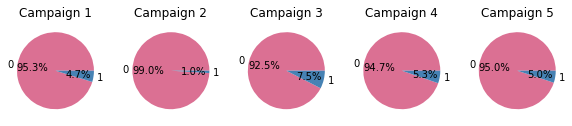

In [39]:
fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(10,10))
# 1,5 denotes 1 row, 5 columns 

colors= 'palevioletred', 'steelblue'

labels = df3['AcceptedCmp1'].unique()
values = df3['AcceptedCmp1'].value_counts()
ax1.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') 

labels = df3['AcceptedCmp2'].unique()
values = df3['AcceptedCmp2'].value_counts()
ax2.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') 

labels = df3['AcceptedCmp3'].unique()
values = df3['AcceptedCmp3'].value_counts()
ax3.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%')

labels = df3['AcceptedCmp4'].unique()
values = df3['AcceptedCmp4'].value_counts()
ax4.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') 

labels = df3['AcceptedCmp5'].unique()
values = df3['AcceptedCmp5'].value_counts()
ax5.pie(values,labels = labels,colors = colors,autopct = '%1.1f%%') 

ax1.set(aspect="equal", title='Campaign 1')
ax2.set(aspect="equal", title='Campaign 2')
ax3.set(aspect="equal", title='Campaign 3')
ax4.set(aspect="equal", title='Campaign 4')
ax5.set(aspect="equal", title='Campaign 5')
plt.show()


<AxesSubplot:>

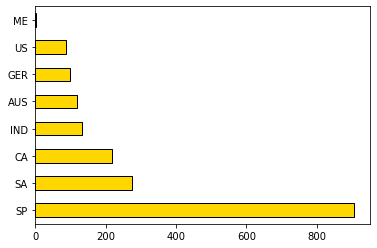

In [40]:
df3['Country'].value_counts().plot(kind='barh', color='gold', edgecolor=(0,0,0))

### Data Visualizaion

In [43]:
#What does the average customer look like for this company?
pd.set_option('display.max_columns', 28)
a=df3.describe(include='all')
a

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,1843.000000,1843.000000,1843,1843,1843.000000,1843.000000,1843.000000,1843,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843
unique,NaN,NaN,5,8,NaN,NaN,NaN,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,8/31/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,933,708,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,905
mean,5589.298426,1969.425936,NaN,NaN,49079.538253,0.499729,0.494303,NaN,48.743896,234.065111,23.081389,139.754205,33.508953,23.659794,40.128595,2.290288,3.734672,2.256647,5.349973,5.471514,0.075421,0.052632,0.050461,0.047206,0.009767,0.136191,0.008681,NaN
std,3274.388274,11.694692,NaN,NaN,25366.527451,0.546805,0.535742,NaN,28.986922,281.247742,37.848072,204.069225,52.667965,38.911699,50.044814,1.832523,2.652642,2.619107,3.096465,2.414584,0.264140,0.223357,0.218954,0.212136,0.098369,0.343084,0.092794,NaN
min,0.000000,1940.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2735.000000,1960.000000,NaN,NaN,32922.000000,0.000000,0.000000,NaN,24.000000,17.500000,1.000000,13.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5513.000000,1971.000000,NaN,NaN,46734.000000,0.000000,0.000000,NaN,49.000000,100.000000,6.000000,45.000000,10.000000,6.000000,20.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8423.500000,1978.000000,NaN,NaN,64853.000000,1.000000,1.000000,NaN,74.000000,385.000000,26.000000,171.000000,39.000000,26.000000,50.000000,3.000000,5.000000,4.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


#### The average client is born in 1969, on Graduation status, Married, making about $49,000 a year, nearly half have children,lives in Spain, visits the webstide about 5 times a month, and mostly purchase at the store. -The average buyer purchases about 234 wines, 23 fruits, 140 meats, 33 fish, 24 sweets, and 40 gold.

<AxesSubplot:>

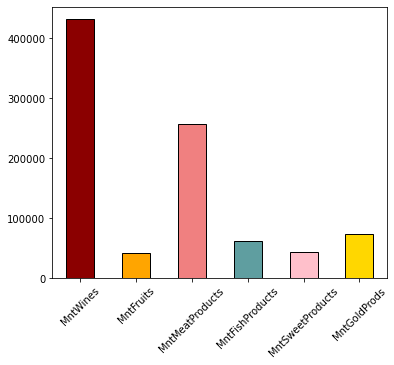

In [44]:
#Which products are performing best?
colors='darkred','orange', 'lightcoral', 'cadetblue', 'pink', 'gold'
products=df3[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts' ,'MntGoldProds']]
products.sum().plot(kind='bar',figsize=(6,5),edgecolor=(0,0,0), color=colors, rot=45)

#### Wines perform best in sales, followed by meats.

<AxesSubplot:>

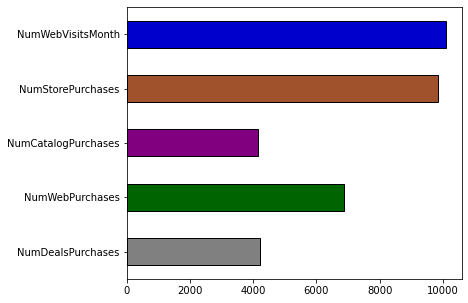

In [45]:
#Which channels are underperforming?
channels=df3[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
colors='gray','darkgreen', 'purple', 'sienna', 'mediumblue'
channels.sum().plot(kind='barh',figsize=(6,5),edgecolor=(0,0,0), color=colors)

#### -Website visits are high, but store purchases performs best.

#### Conclusion
The top 5 years of customer's birth fall on the 1970s.

Most are married and met graduation as highest education level.

The majority of clients make under $100,000 and over half of them do not have kids or teens at home.
Country listed the most is Spain.

The average client is born in 1969, on Graduation status, Married, making about $49,000 a year, nearly half have children,lives in Spain, visits the webstide about 5 times a month, and mostly purchase at the store.

-The average buyer purchases about 234 wines, 23 fruits, 140 meats, 33 fish, 24 sweets, and 40 gold.

Wine preforms best.

store purchases performs best